In [549]:
#importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [550]:
import warnings
warnings.filterwarnings('ignore')



In [551]:
#importing datas

df = pd.read_csv('parkinsons_disease_data.csv')

In [552]:
#to view top 5 rows
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058.0,85.0,0.0,3.0,1.0,19.619878,0.0,5.108241,1.380660,3.893969,...,1.572427,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrXXXConfid
1,3059.0,75.0,0.0,0.0,2.0,16.247339,1.0,6.027648,8.409804,8.513428,...,4.787551,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,DrXXXConfid
2,3060.0,70.0,1.0,0.0,0.0,15.368239,0.0,2.242135,0.213275,6.498805,...,2.130686,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,DrXXXConfid
3,3061.0,52.0,0.0,0.0,0.0,15.454557,0.0,5.997788,1.375045,6.715033,...,3.391288,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,DrXXXConfid
4,3062.0,87.0,0.0,0.0,1.0,18.616042,0.0,9.775243,1.188607,4.657572,...,3.200969,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,DrXXXConfid


In [553]:
#To view the dimensions of the dataset
df.shape

(6315, 35)

In [554]:
col_names = df.columns
col_names


Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury',
       'Hypertension', 'Diabetes', 'Depression', 'Stroke', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'UPDRS', 'MoCA', 'FunctionalAssessment',
       'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability',
       'SpeechProblems', 'SleepDisorders', 'Constipation', 'Diagnosis',
       'DoctorInCharge'],
      dtype='object')

In [555]:
#Dropping columns that are not contributing to the analysis
df.drop(['DoctorInCharge', 'PatientID', 'EducationLevel','Education'], axis=1, inplace=True, errors='ignore')


In [556]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6315 entries, 0 to 6314
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       6315 non-null   float64
 1   Gender                    6315 non-null   float64
 2   Ethnicity                 6315 non-null   float64
 3   BMI                       6315 non-null   float64
 4   Smoking                   6315 non-null   float64
 5   AlcoholConsumption        6315 non-null   float64
 6   PhysicalActivity          6315 non-null   float64
 7   DietQuality               6315 non-null   float64
 8   SleepQuality              6315 non-null   float64
 9   FamilyHistoryParkinsons   6315 non-null   float64
 10  TraumaticBrainInjury      6315 non-null   float64
 11  Hypertension              6315 non-null   float64
 12  Diabetes                  6315 non-null   float64
 13  Depression                6315 non-null   float64
 14  Stroke  

In [557]:
#find categorical variables

categorical = [var for var in df.columns if df[var].dtype =='0']
print("there are {} categorical varaibles\n".format(len(categorical)))

there are 0 categorical varaibles



In [558]:
#View the categorical variables
df[categorical].head()

""
0
1
2
3
4


In [559]:
#CHecking the missing values in categorical variables
df[categorical].isnull().sum()

Series([], dtype: float64)

In [560]:
#view the frequency of categorical variables
for var in categorical:
    print(df[var].value_counts())

In [561]:
#checing for cardinality in categorical variables

for var in categorical:
    print(var,'contain',len(df[var.unique()]),'labels')

In [562]:
print(df.columns.tolist())

['Age', 'Gender', 'Ethnicity', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury', 'Hypertension', 'Diabetes', 'Depression', 'Stroke', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'UPDRS', 'MoCA', 'FunctionalAssessment', 'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability', 'SpeechProblems', 'SleepDisorders', 'Constipation', 'Diagnosis']


In [563]:
#again view the summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6315 entries, 0 to 6314
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       6315 non-null   float64
 1   Gender                    6315 non-null   float64
 2   Ethnicity                 6315 non-null   float64
 3   BMI                       6315 non-null   float64
 4   Smoking                   6315 non-null   float64
 5   AlcoholConsumption        6315 non-null   float64
 6   PhysicalActivity          6315 non-null   float64
 7   DietQuality               6315 non-null   float64
 8   SleepQuality              6315 non-null   float64
 9   FamilyHistoryParkinsons   6315 non-null   float64
 10  TraumaticBrainInjury      6315 non-null   float64
 11  Hypertension              6315 non-null   float64
 12  Diabetes                  6315 non-null   float64
 13  Depression                6315 non-null   float64
 14  Stroke  

In [564]:
# Preview the dataset again
df.head()

,Age,Gender,Ethnicity,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,...,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
0,85.0,0.0,3.0,19.619878,0.0,5.108241,1.380660,3.893969,9.283194,0.0,...,29.181289,1.572427,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,75.0,0.0,0.0,16.247339,1.0,6.027648,8.409804,8.513428,5.602470,0.0,...,12.332639,4.787551,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,70.0,1.0,0.0,15.368239,0.0,2.242135,0.213275,6.498805,9.929824,0.0,...,29.927783,2.130686,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
3,52.0,0.0,0.0,15.454557,0.0,5.997788,1.375045,6.715033,4.196189,0.0,...,21.304268,3.391288,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
4,87.0,0.0,0.0,18.616042,0.0,9.775243,1.188607,4.657572,9.363925,0.0,...,8.336364,3.200969,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [565]:
#Find categorical variables

categorical = [var for var in df.columns if df[var].dtype == 'O']
print("There are {} categorical variables\n".format(len(categorical)))

print("The categorical variables are: ", categorical)


There are 0 categorical variables

The categorical variables are:  []


In [566]:
#CHecking for the missing values among the categorical values

df[categorical].isnull().sum()


Series([], dtype: float64)

In [567]:
#Exploring the numerical variables
#FInd numerical variables

numerical = [var for var in df.columns if df[var].dtype != 'O']
print("There are {} numerical variables\n".format(len(numerical)))
print('The numerical variables are :', numerical)

There are 32 numerical variables

The numerical variables are : ['Age', 'Gender', 'Ethnicity', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury', 'Hypertension', 'Diabetes', 'Depression', 'Stroke', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'UPDRS', 'MoCA', 'FunctionalAssessment', 'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability', 'SpeechProblems', 'SleepDisorders', 'Constipation', 'Diagnosis']


In [568]:
#view the numerical variables
df[numerical].head()

,Age,Gender,Ethnicity,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,...,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
0,85.0,0.0,3.0,19.619878,0.0,5.108241,1.380660,3.893969,9.283194,0.0,...,29.181289,1.572427,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,75.0,0.0,0.0,16.247339,1.0,6.027648,8.409804,8.513428,5.602470,0.0,...,12.332639,4.787551,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,70.0,1.0,0.0,15.368239,0.0,2.242135,0.213275,6.498805,9.929824,0.0,...,29.927783,2.130686,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
3,52.0,0.0,0.0,15.454557,0.0,5.997788,1.375045,6.715033,4.196189,0.0,...,21.304268,3.391288,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
4,87.0,0.0,0.0,18.616042,0.0,9.775243,1.188607,4.657572,9.363925,0.0,...,8.336364,3.200969,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [569]:
#check missing value in numerical variables
df[numerical].isnull().sum()


Age                         0
Gender                      0
Ethnicity                   0
BMI                         0
Smoking                     0
AlcoholConsumption          0
PhysicalActivity            0
DietQuality                 0
SleepQuality                0
FamilyHistoryParkinsons     0
TraumaticBrainInjury        0
Hypertension                0
Diabetes                    0
Depression                  0
Stroke                      0
SystolicBP                  0
DiastolicBP                 0
CholesterolTotal            0
CholesterolLDL              0
CholesterolHDL              0
CholesterolTriglycerides    0
UPDRS                       0
MoCA                        0
FunctionalAssessment        0
Tremor                      0
Rigidity                    0
Bradykinesia                0
PosturalInstability         0
SpeechProblems              0
SleepDisorders              0
Constipation                0
Diagnosis                   0
dtype: int64

In [570]:
#Outlier in numerical variables
print(round(df[numerical].describe()),2)



          Age  Gender  Ethnicity     BMI  Smoking  AlcoholConsumption  \
count  6315.0  6315.0     6315.0  6315.0   6315.0              6315.0   
mean     70.0     0.0        1.0    27.0      0.0                10.0   
std      12.0     1.0        1.0     7.0      0.0                 6.0   
min      49.0    -0.0       -0.0    15.0     -0.0                -0.0   
25%      60.0     0.0        0.0    21.0      0.0                 5.0   
50%      70.0     0.0        0.0    27.0      0.0                10.0   
75%      80.0     1.0        1.0    33.0      1.0                15.0   
max      90.0     1.0        3.0    40.0      1.0                20.0   

       PhysicalActivity  DietQuality  SleepQuality  FamilyHistoryParkinsons  \
count            6315.0       6315.0        6315.0                   6315.0   
mean                5.0          5.0           7.0                      0.0   
std                 3.0          3.0           2.0                      0.0   
min                -0.0   

Text(0, 0.5, 'SystolicBP')

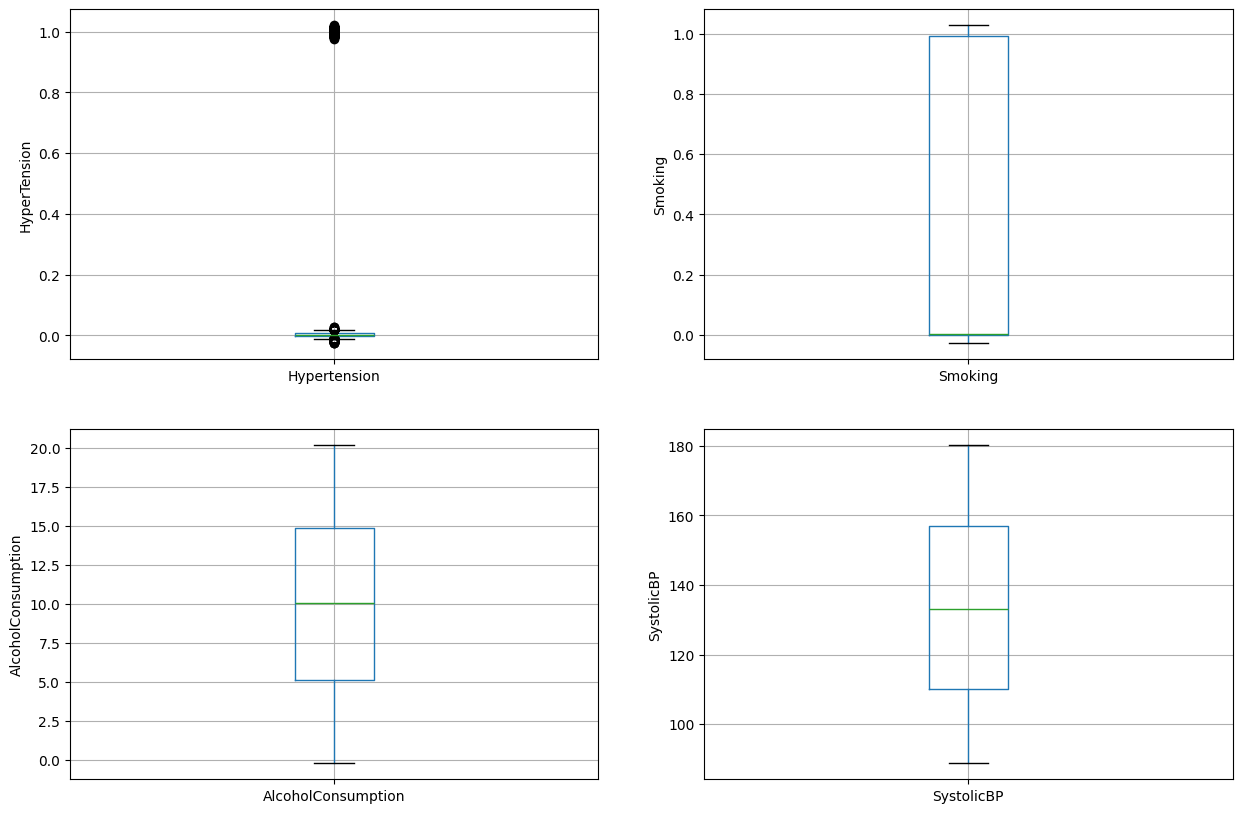

In [571]:
#draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Hypertension')
fig.set_title('')
fig.set_ylabel('HyperTension')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Smoking')
fig.set_title('')
fig.set_ylabel('Smoking')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='AlcoholConsumption')
fig.set_title('')
fig.set_ylabel('AlcoholConsumption')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='SystolicBP')
fig.set_title('')
fig.set_ylabel('SystolicBP')



Text(0, 0.5, 'Diagnosis')

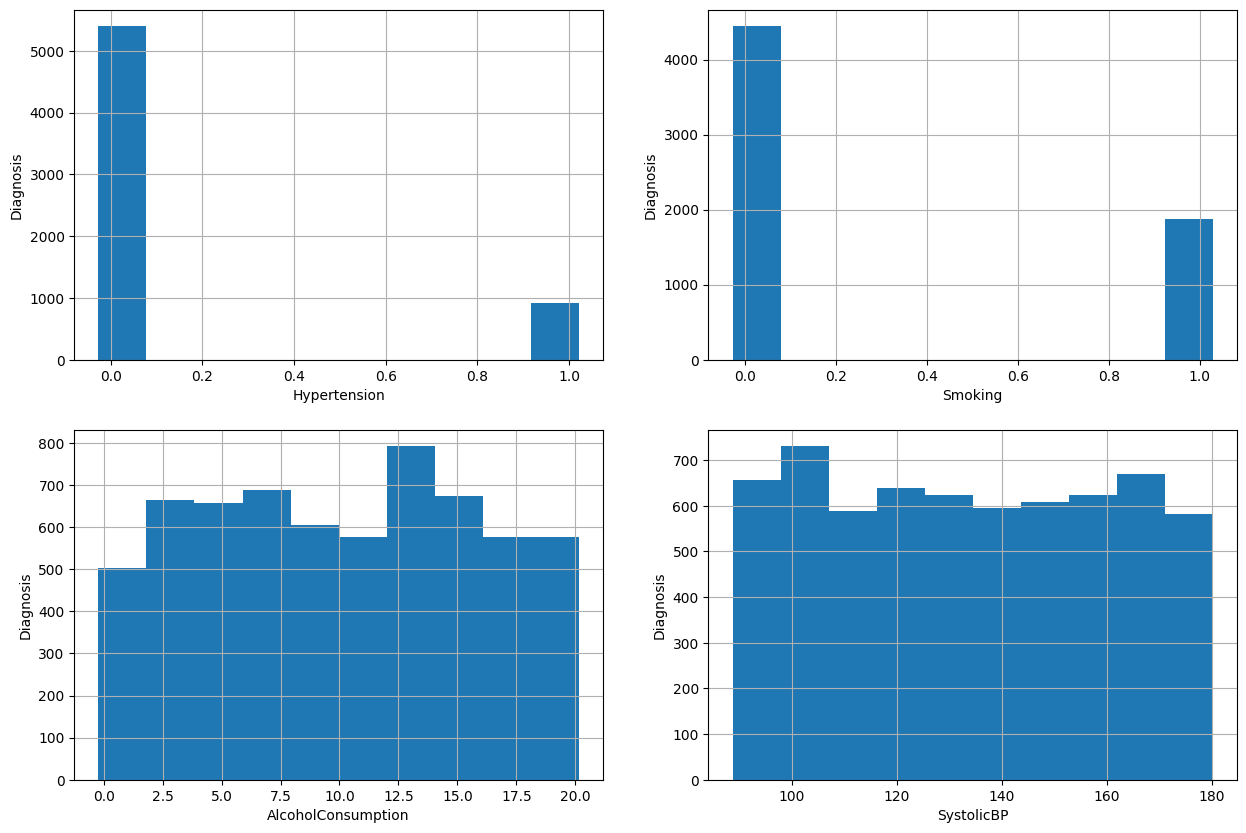

In [572]:
#To check for normal or skewed distribution of numerical variables
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Hypertension.hist(bins=10)
fig.set_xlabel('Hypertension')
fig.set_ylabel('Diagnosis')


plt.subplot(2, 2, 2)
fig = df.Smoking.hist(bins=10)
fig.set_xlabel('Smoking')
fig.set_ylabel('Diagnosis')


plt.subplot(2, 2, 3)
fig = df.AlcoholConsumption.hist(bins=10)
fig.set_xlabel('AlcoholConsumption')
fig.set_ylabel('Diagnosis')


plt.subplot(2, 2, 4)
fig = df.SystolicBP.hist(bins=10)
fig.set_xlabel('SystolicBP')
fig.set_ylabel('Diagnosis')

In [573]:
#To find outliers in Hypertension variable
IQR = df.Hypertension.quantile(0.75) - df.Hypertension.quantile(0.25)
Lower_fence = df.Hypertension.quantile(0.25) - (IQR * 3)
Upper_fence = df.Hypertension.quantile(0.75) + (IQR * 3)
print('Hypertension outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Hypertension outliers are values < -0.02221608299706225 or > 0.02813380216364645


In [574]:
#To find outliers in Smoking variable
IQR = df.Smoking.quantile(0.75) - df.Smoking.quantile(0.25)
Lower_fence = df.Smoking.quantile(0.25) - (IQR * 3)
Upper_fence = df.Smoking.quantile(0.75) + (IQR * 3)
print('Smoking outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))



Smoking outliers are values < -2.9804196844351036 or > 3.973892912580138


In [575]:
#To find outliers in AlcoholConsumption variable
IQR = df.AlcoholConsumption .quantile(0.75) - df.AlcoholConsumption .quantile(0.25)
Lower_fence = df.AlcoholConsumption .quantile(0.25) - (IQR * 3)
Upper_fence = df.AlcoholConsumption .quantile(0.75) + (IQR * 3)
print('AlcoholConsumption  outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))



AlcoholConsumption  outliers are values < -23.968154994659976 or > 43.96643666329831


In [576]:
#To find outliers in SystolicBP variable
IQR = df.SystolicBP.quantile(0.75) - df.SystolicBP.quantile(0.25)
Lower_fence = df.SystolicBP.quantile(0.25) - (IQR * 3)
Upper_fence = df.SystolicBP.quantile(0.75) + (IQR * 3)
print('SystolicBP outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))



SystolicBP outliers are values < -30.75492528170318 or > 297.6732337089376


In [577]:
#Declare feature vector and target variable
X = df.drop('Diagnosis', axis = 1)
y = df['Diagnosis']


In [578]:
#SPlit X and Y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [579]:
#check the shape of X_train and X_test
X_train.shape, X_test.shape


((5052, 31), (1263, 31))

In [580]:
#Check data types in X_train
X_train.dtypes

Age                         float64
Gender                      float64
Ethnicity                   float64
BMI                         float64
Smoking                     float64
AlcoholConsumption          float64
PhysicalActivity            float64
DietQuality                 float64
SleepQuality                float64
FamilyHistoryParkinsons     float64
TraumaticBrainInjury        float64
Hypertension                float64
Diabetes                    float64
Depression                  float64
Stroke                      float64
SystolicBP                  float64
DiastolicBP                 float64
CholesterolTotal            float64
CholesterolLDL              float64
CholesterolHDL              float64
CholesterolTriglycerides    float64
UPDRS                       float64
MoCA                        float64
FunctionalAssessment        float64
Tremor                      float64
Rigidity                    float64
Bradykinesia                float64
PosturalInstability         

In [581]:
#check missing values in numerical variables in X_train

numerical_no_diag = [col for col in X_train.columns 
                     if X_train[col].dtype != 'object' and col != 'Diagnosis']
#Excluding diagnosis because it is our target variable

In [582]:
X_test[numerical_no_diag].isnull().sum()

Age                         0
Gender                      0
Ethnicity                   0
BMI                         0
Smoking                     0
AlcoholConsumption          0
PhysicalActivity            0
DietQuality                 0
SleepQuality                0
FamilyHistoryParkinsons     0
TraumaticBrainInjury        0
Hypertension                0
Diabetes                    0
Depression                  0
Stroke                      0
SystolicBP                  0
DiastolicBP                 0
CholesterolTotal            0
CholesterolLDL              0
CholesterolHDL              0
CholesterolTriglycerides    0
UPDRS                       0
MoCA                        0
FunctionalAssessment        0
Tremor                      0
Rigidity                    0
Bradykinesia                0
PosturalInstability         0
SpeechProblems              0
SleepDisorders              0
Constipation                0
dtype: int64

In [583]:
#check again missing values in numerical variables in X_train

X_train[numerical_no_diag].isnull().sum()

Age                         0
Gender                      0
Ethnicity                   0
BMI                         0
Smoking                     0
AlcoholConsumption          0
PhysicalActivity            0
DietQuality                 0
SleepQuality                0
FamilyHistoryParkinsons     0
TraumaticBrainInjury        0
Hypertension                0
Diabetes                    0
Depression                  0
Stroke                      0
SystolicBP                  0
DiastolicBP                 0
CholesterolTotal            0
CholesterolLDL              0
CholesterolHDL              0
CholesterolTriglycerides    0
UPDRS                       0
MoCA                        0
FunctionalAssessment        0
Tremor                      0
Rigidity                    0
Bradykinesia                0
PosturalInstability         0
SpeechProblems              0
SleepDisorders              0
Constipation                0
dtype: int64

In [584]:
#check missing values in numerical variables in X_test

X_test[numerical_no_diag].isnull().sum()

Age                         0
Gender                      0
Ethnicity                   0
BMI                         0
Smoking                     0
AlcoholConsumption          0
PhysicalActivity            0
DietQuality                 0
SleepQuality                0
FamilyHistoryParkinsons     0
TraumaticBrainInjury        0
Hypertension                0
Diabetes                    0
Depression                  0
Stroke                      0
SystolicBP                  0
DiastolicBP                 0
CholesterolTotal            0
CholesterolLDL              0
CholesterolHDL              0
CholesterolTriglycerides    0
UPDRS                       0
MoCA                        0
FunctionalAssessment        0
Tremor                      0
Rigidity                    0
Bradykinesia                0
PosturalInstability         0
SpeechProblems              0
SleepDisorders              0
Constipation                0
dtype: int64

In [585]:
#check missing values in X_train
X_train.isnull().sum()

Age                         0
Gender                      0
Ethnicity                   0
BMI                         0
Smoking                     0
AlcoholConsumption          0
PhysicalActivity            0
DietQuality                 0
SleepQuality                0
FamilyHistoryParkinsons     0
TraumaticBrainInjury        0
Hypertension                0
Diabetes                    0
Depression                  0
Stroke                      0
SystolicBP                  0
DiastolicBP                 0
CholesterolTotal            0
CholesterolLDL              0
CholesterolHDL              0
CholesterolTriglycerides    0
UPDRS                       0
MoCA                        0
FunctionalAssessment        0
Tremor                      0
Rigidity                    0
Bradykinesia                0
PosturalInstability         0
SpeechProblems              0
SleepDisorders              0
Constipation                0
dtype: int64

In [586]:
#check missing values in X_test

X_test.isnull().sum()

Age                         0
Gender                      0
Ethnicity                   0
BMI                         0
Smoking                     0
AlcoholConsumption          0
PhysicalActivity            0
DietQuality                 0
SleepQuality                0
FamilyHistoryParkinsons     0
TraumaticBrainInjury        0
Hypertension                0
Diabetes                    0
Depression                  0
Stroke                      0
SystolicBP                  0
DiastolicBP                 0
CholesterolTotal            0
CholesterolLDL              0
CholesterolHDL              0
CholesterolTriglycerides    0
UPDRS                       0
MoCA                        0
FunctionalAssessment        0
Tremor                      0
Rigidity                    0
Bradykinesia                0
PosturalInstability         0
SpeechProblems              0
SleepDisorders              0
Constipation                0
dtype: int64

In [587]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Hypertension'] = max_value(df3, 'Hypertension', 0.02813380216364645)
    df3['Smoking'] = max_value(df3, 'Smoking', 3.9742407363520673)
    df3['AlcoholConsumption'] = max_value(df3, 'AlcoholConsumption',43.98349498208154 )
    df3['SystolicBP'] = max_value(df3, 'SystolicBP',297.89149064689946 )

In [588]:
X_train.Hypertension.max(), X_test.Hypertension.max()

(np.float64(0.02813380216364645), np.float64(0.02813380216364645))

In [589]:
X_train.Smoking.max(), X_test.Smoking.max()    

(np.float64(1.02858351896434), np.float64(1.028503887576315))

In [590]:
X_train.AlcoholConsumption.max(), X_test.AlcoholConsumption.max()

(np.float64(20.148579692184597), np.float64(20.078592647326072))

In [591]:
X_train.SystolicBP.max(), X_test.SystolicBP.max()

(np.float64(180.1502485028895), np.float64(179.6339225226122))

In [592]:
X_train[numerical_no_diag].describe()

,Age,Gender,Ethnicity,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,...,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation
count,5052.000000,5052.000000,5052.000000,5052.000000,5052.000000,5052.000000,5052.000000,5052.000000,5052.000000,5052.000000,...,5052.000000,5052.000000,5052.000000,5052.000000,5052.000000,5052.000000,5052.000000,5052.000000,5052.000000,5052.000000
mean,69.533105,0.490165,0.694291,27.150376,0.297457,10.060719,5.007748,4.920006,7.004759,0.144432,...,100.731764,15.102734,4.967725,0.429613,0.252473,0.208659,0.139237,0.296536,0.250684,0.294112
std,11.580984,0.499975,1.006799,7.163231,0.457363,5.694560,2.890767,2.874385,1.758165,0.351532,...,56.641165,8.650605,2.929792,0.495144,0.434613,0.406510,0.346192,0.456698,0.433425,0.455660
min,49.470327,-0.029852,-0.083882,14.848667,-0.028106,-0.221564,-0.098216,-0.126803,3.935449,-0.022955,...,-1.451583,-0.214709,-0.089555,-0.036131,-0.030529,-0.029269,-0.025380,-0.028493,-0.029377,-0.029051
25%,59.319260,0.000000,0.000000,20.842613,0.000000,5.110857,2.445670,2.481777,5.499487,-0.000814,...,52.137188,7.547650,2.377156,0.000000,-0.000396,-0.000628,-0.000951,0.000000,0.000000,0.000000
50%,70.000000,0.020156,0.012669,27.044120,0.001406,10.094383,5.036927,4.830399,6.942453,0.000000,...,102.161782,14.937231,4.906450,0.008686,0.000000,0.000000,0.000000,0.001527,0.000210,0.001698
75%,79.357034,1.000000,1.004853,33.329900,0.993629,14.908436,7.518210,7.376560,8.575861,0.006541,...,148.972934,22.615773,7.483871,1.000000,0.980452,0.011426,0.006078,0.993541,0.976487,0.993854
max,89.601899,1.042184,3.065570,40.278390,1.028584,20.148580,10.050757,10.070645,10.057279,1.020767,...,200.393949,30.158453,10.043268,1.035894,1.022611,1.025901,1.018751,1.028552,1.028671,1.027776


In [593]:
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

Non-numeric columns: Index([], dtype='object')


In [594]:

X_train.head()

,Age,Gender,Ethnicity,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,...,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation
4175,87.118579,1.007633,2.989719,35.617085,0.997376,7.215440,7.001456,8.415149,5.764082,1.000700,...,44.417079,6.424681,1.228448,-0.003016,0.007316,-0.006369,1.008985,-0.008259,0.999231,-0.007102
5019,72.807475,-0.012438,0.005767,33.796397,1.010653,13.626954,7.803832,3.122720,8.937515,0.010657,...,11.400593,20.303058,0.786374,0.001492,1.007622,0.003731,0.000053,0.990268,0.997551,1.002152
2585,82.986099,0.994976,0.022068,38.988742,0.978976,15.093245,6.134167,4.406722,5.603595,0.994204,...,95.520224,27.679928,7.630411,-0.001032,0.008372,-0.012194,0.995626,-0.005100,0.000128,0.000681
5911,77.183199,1.007326,2.023506,22.530729,-0.001892,2.597218,7.001785,5.902999,5.469952,1.010387,...,121.846644,21.533015,8.502304,0.011597,-0.002688,-0.001745,-0.004035,0.015659,1.005443,1.010100
575,82.000000,0.000000,0.000000,21.902667,0.000000,4.928344,4.934097,6.272226,8.798492,1.000000,...,37.404903,8.711121,9.380839,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [614]:
X_train.head()

,Age,Gender,Ethnicity,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,...,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation
4175,87.118579,1.007633,2.989719,35.617085,0.997376,7.215440,7.001456,8.415149,5.764082,1.000700,...,44.417079,6.424681,1.228448,-0.003016,0.007316,-0.006369,1.008985,-0.008259,0.999231,-0.007102
5019,72.807475,-0.012438,0.005767,33.796397,1.010653,13.626954,7.803832,3.122720,8.937515,0.010657,...,11.400593,20.303058,0.786374,0.001492,1.007622,0.003731,0.000053,0.990268,0.997551,1.002152
2585,82.986099,0.994976,0.022068,38.988742,0.978976,15.093245,6.134167,4.406722,5.603595,0.994204,...,95.520224,27.679928,7.630411,-0.001032,0.008372,-0.012194,0.995626,-0.005100,0.000128,0.000681
5911,77.183199,1.007326,2.023506,22.530729,-0.001892,2.597218,7.001785,5.902999,5.469952,1.010387,...,121.846644,21.533015,8.502304,0.011597,-0.002688,-0.001745,-0.004035,0.015659,1.005443,1.010100
575,82.000000,0.000000,0.000000,21.902667,0.000000,4.928344,4.934097,6.272226,8.798492,1.000000,...,37.404903,8.711121,9.380839,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [613]:
print(X_train.columns.tolist())

['Age', 'Gender', 'Ethnicity', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury', 'Hypertension', 'Diabetes', 'Depression', 'Stroke', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'UPDRS', 'MoCA', 'FunctionalAssessment', 'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability', 'SpeechProblems', 'SleepDisorders', 'Constipation']


In [597]:
X_test.head()

,Age,Gender,Ethnicity,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,...,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation
5784,76.227178,-0.008157,2.984080,29.319768,-0.017577,1.688390,9.873685,5.303427,9.383013,0.997803,...,118.123008,1.773346,9.051363,-0.020388,1.014559,-0.009537,0.005253,-0.010764,-0.000700,0.999198
6241,89.157468,1.009014,1.019136,16.029019,0.993780,1.138141,1.699853,1.720503,6.805008,0.001453,...,49.421608,4.911767,2.012267,0.005000,0.007888,0.011044,0.001393,0.011394,-0.005787,-0.000485
1314,57.000000,1.000000,3.000000,20.716666,0.000000,11.513551,7.954645,2.146149,8.355160,0.000000,...,146.431065,13.331306,1.063975,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3472,78.782116,-0.008071,-0.020858,23.150960,-0.003196,2.459704,0.402865,0.618130,4.795213,0.011018,...,115.541481,0.967733,1.641686,-0.007788,0.002429,0.004876,-0.007873,0.992753,-0.003552,0.003703
3362,50.086883,-0.013717,-0.015239,30.333251,1.005420,12.254873,7.201522,3.170720,9.939322,-0.009528,...,33.184008,21.231378,5.395792,1.002912,-0.014267,-0.004442,-0.005133,-0.006140,1.000275,0.989583


In [603]:
#feature Scaling
X_train.describe()

,Age,Gender,Ethnicity,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,...,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation
count,5052.000000,5052.000000,5052.000000,5052.000000,5052.000000,5052.000000,5052.000000,5052.000000,5052.000000,5052.000000,...,5052.000000,5052.000000,5052.000000,5052.000000,5052.000000,5052.000000,5052.000000,5052.000000,5052.000000,5052.000000
mean,69.533105,0.490165,0.694291,27.150376,0.297457,10.060719,5.007748,4.920006,7.004759,0.144432,...,100.731764,15.102734,4.967725,0.429613,0.252473,0.208659,0.139237,0.296536,0.250684,0.294112
std,11.580984,0.499975,1.006799,7.163231,0.457363,5.694560,2.890767,2.874385,1.758165,0.351532,...,56.641165,8.650605,2.929792,0.495144,0.434613,0.406510,0.346192,0.456698,0.433425,0.455660
min,49.470327,-0.029852,-0.083882,14.848667,-0.028106,-0.221564,-0.098216,-0.126803,3.935449,-0.022955,...,-1.451583,-0.214709,-0.089555,-0.036131,-0.030529,-0.029269,-0.025380,-0.028493,-0.029377,-0.029051
25%,59.319260,0.000000,0.000000,20.842613,0.000000,5.110857,2.445670,2.481777,5.499487,-0.000814,...,52.137188,7.547650,2.377156,0.000000,-0.000396,-0.000628,-0.000951,0.000000,0.000000,0.000000
50%,70.000000,0.020156,0.012669,27.044120,0.001406,10.094383,5.036927,4.830399,6.942453,0.000000,...,102.161782,14.937231,4.906450,0.008686,0.000000,0.000000,0.000000,0.001527,0.000210,0.001698
75%,79.357034,1.000000,1.004853,33.329900,0.993629,14.908436,7.518210,7.376560,8.575861,0.006541,...,148.972934,22.615773,7.483871,1.000000,0.980452,0.011426,0.006078,0.993541,0.976487,0.993854
max,89.601899,1.042184,3.065570,40.278390,1.028584,20.148580,10.050757,10.070645,10.057279,1.020767,...,200.393949,30.158453,10.043268,1.035894,1.022611,1.025901,1.018751,1.028552,1.028671,1.027776


In [615]:
cols = X_train.columns

In [616]:
X_train.describe()


,Age,Gender,Ethnicity,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,...,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation
count,5052.000000,5052.000000,5052.000000,5052.000000,5052.000000,5052.000000,5052.000000,5052.000000,5052.000000,5052.000000,...,5052.000000,5052.000000,5052.000000,5052.000000,5052.000000,5052.000000,5052.000000,5052.000000,5052.000000,5052.000000
mean,69.533105,0.490165,0.694291,27.150376,0.297457,10.060719,5.007748,4.920006,7.004759,0.144432,...,100.731764,15.102734,4.967725,0.429613,0.252473,0.208659,0.139237,0.296536,0.250684,0.294112
std,11.580984,0.499975,1.006799,7.163231,0.457363,5.694560,2.890767,2.874385,1.758165,0.351532,...,56.641165,8.650605,2.929792,0.495144,0.434613,0.406510,0.346192,0.456698,0.433425,0.455660
min,49.470327,-0.029852,-0.083882,14.848667,-0.028106,-0.221564,-0.098216,-0.126803,3.935449,-0.022955,...,-1.451583,-0.214709,-0.089555,-0.036131,-0.030529,-0.029269,-0.025380,-0.028493,-0.029377,-0.029051
25%,59.319260,0.000000,0.000000,20.842613,0.000000,5.110857,2.445670,2.481777,5.499487,-0.000814,...,52.137188,7.547650,2.377156,0.000000,-0.000396,-0.000628,-0.000951,0.000000,0.000000,0.000000
50%,70.000000,0.020156,0.012669,27.044120,0.001406,10.094383,5.036927,4.830399,6.942453,0.000000,...,102.161782,14.937231,4.906450,0.008686,0.000000,0.000000,0.000000,0.001527,0.000210,0.001698
75%,79.357034,1.000000,1.004853,33.329900,0.993629,14.908436,7.518210,7.376560,8.575861,0.006541,...,148.972934,22.615773,7.483871,1.000000,0.980452,0.011426,0.006078,0.993541,0.976487,0.993854
max,89.601899,1.042184,3.065570,40.278390,1.028584,20.148580,10.050757,10.070645,10.057279,1.020767,...,200.393949,30.158453,10.043268,1.035894,1.022611,1.025901,1.018751,1.028552,1.028671,1.027776


In [ ]:
print(y_train.unique())
y_train = (y_train >= 0.5).astype(int)

print(y_test.unique())
y_test = (y_test >= 0.5).astype(int)


[ 1.00458369  0.00555189  0.00622758 ... -0.01604151 -0.0068484
  1.00585009]


In [620]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [621]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([1, 0, 1, ..., 0, 1, 1], shape=(1263,))

In [622]:
# probability of getting output as 0 - no Parkinson's disease

logreg.predict_proba(X_test)[:,0]

array([0.31973399, 0.55534177, 0.0394445 , ..., 0.9585626 , 0.18165766,
       0.18112584], shape=(1263,))

In [623]:
# probability of getting output as 1 - Parkinson's disease

logreg.predict_proba(X_test)[:,1]


array([0.68026601, 0.44465823, 0.9605555 , ..., 0.0414374 , 0.81834234,
       0.81887416], shape=(1263,))

In [624]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [ ]:

y_pred_train = logreg.predict(X_train)

y_pred_train

NameError: name 'logreg' is not defined

In [ ]:

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

NameError: name 'array' is not defined

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

In [ ]:
# fit the Logsitic Regression model with C=100

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(X_train, y_train)

NameError: name 'LogisticRegression' is not defined

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

In [ ]:
# fit the Logsitic Regression model with C=001

# instantiate the model
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(X_train, y_train)

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

In [ ]:
# check class distribution in test set

y_test.value_counts()

In [ ]:
# check null accuracy score

null_accuracy = (22067/(22067+6372))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

In [ ]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

In [ ]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

In [ ]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

In [ ]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

In [ ]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

In [ ]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

In [ ]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = logreg.predict_proba(X_test)[0:10]

y_pred_prob

In [ ]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No rain tomorrow (0)', 'Prob of - Rain tomorrow (1)'])

y_pred_prob_df

In [ ]:
# print the first 10 predicted probabilities for class 1 - Probability of rain

logreg.predict_proba(X_test)[0:10, 1]

In [ ]:
# store the predicted probabilities for class 1 - Probability of rain

y_pred1 = logreg.predict_proba(X_test)[:, 1]

In [ ]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of Parkinsons disease')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of Parkinsons disease')
plt.ylabel('Frequency')

In [ ]:
from sklearn.preprocessing import binarize

for i in range(1,5):
    
    cm1=0
    
    y_pred1 = logreg.predict_proba(X_test)[:,1]
    
    y_pred1 = y_pred1.reshape(-1,1)
    
    y_pred2 = binarize(y_pred1, i/10)
    
    y_pred2 = np.where(y_pred2 == 1, 'Yes', 'No')
    
    cm1 = confusion_matrix(y_test, y_pred2)
        
    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',
           
            'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n', 
           
            cm1[0,1],'Type I errors( False Positives), ','\n\n',
           
            cm1[1,0],'Type II errors( False Negatives), ','\n\n',
           
           'Accuracy score: ', (accuracy_score(y_test, y_pred2)), '\n\n',
           
           'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',
           
           'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n',
          
            '====================================================', '\n\n')

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 'Yes')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Parkinson_s classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [ ]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

NameError: name 'y_pred1' is not defined

In [ ]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=logreg, step=1, cv=5, scoring='accuracy')

rfecv = rfecv.fit(X_train, y_train)

In [ ]:
print("Optimal number of features : %d" % rfecv.n_features_)

In [ ]:
# transform the training data

X_train_rfecv = rfecv.transform(X_train)


# train classifier

logreg.fit(X_train_rfecv, y_train)

NameError: name 'rfecv' is not defined

In [ ]:
# test classifier on test data

X_test_rfecv = rfecv.transform(X_test)

y_pred_rfecv = logreg.predict(X_test_rfecv)

In [ ]:
# print mean accuracy on transformed test data and labels

print ("Classifier score: {:.4f}".format(logreg.score(X_test_rfecv,y_test)))

In [ ]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test, y_pred_rfecv)

print('Confusion matrix\n\n', cm1)

print('\nTrue Positives(TP1) = ', cm1[0,0])

print('\nTrue Negatives(TN1) = ', cm1[1,1])

print('\nFalse Positives(FP1) = ', cm1[0,1])

print('\nFalse Negatives(FN1) = ', cm1[1,0])

In [ ]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

In [ ]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

In [ ]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

In [ ]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

NameError: name 'grid_search' is not defined